In [1]:
import pandas as pd

# Load the dataset
file_path = "F:\SEM 6\Machine Learning\Dataset\ev_charging_patterns.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   599 non-null    object 
 1   Vehicle Model                             599 non-null    object 
 2   Battery Capacity (kWh)                    599 non-null    float64
 3   Energy Consumed                           568 non-null    float64
 4   Charging Duration (hours)                 599 non-null    float64
 5   Charging Rate (kW)                        569 non-null    float64
 6   Time of Day                               599 non-null    object 
 7   State of Charge (Start %)                 599 non-null    float64
 8   Distance Driven (since last charge) (km)  569 non-null    float64
 9   User Type                                 599 non-null    object 
dtypes: float64(6), object(4)
memory usage:

(None,
   User ID Vehicle Model  Battery Capacity (kWh)  Energy Consumed  \
 0  User_1        BMW i3              108.463007        60.712346   
 1  User_2  Hyundai Kona              100.000000        12.339275   
 2  User_3    Chevy Bolt               75.000000        19.128876   
 3  User_4  Hyundai Kona               50.000000        79.457824   
 4  User_5  Hyundai Kona               50.000000        19.629104   
 
    Charging Duration (hours)  Charging Rate (kW) Time of Day  \
 0                   0.591363           36.389181     Evening   
 1                   3.133652           30.677735     Morning   
 2                   2.452653           27.513593     Morning   
 3                   1.266431           32.882870     Evening   
 4                   2.019765           10.215712     Morning   
 
    State of Charge (Start %)  Distance Driven (since last charge) (km)  \
 0                  29.371576                                293.602111   
 1                  10.115778      

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Drop User ID
df = df.drop(columns=['User ID'])

# Handle missing values by filling with mean for numerical columns
imputer = SimpleImputer(strategy="mean")
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Encode categorical features
label_encoders = {}
for col in ['Vehicle Model', 'Time of Day']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for reference

# Encode target variable (User Type)
target_encoder = LabelEncoder()
df['User Type'] = target_encoder.fit_transform(df['User Type'])

# Split dataset into features (X) and target (y)
X = df.drop(columns=['User Type'])
y = df['User Type']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data is now preprocessed and ready for MLP training. Next step: Train the MLP classifier.
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((479, 8), (120, 8), (479,), (120,))

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define and train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predict on test data
y_pred = mlp.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

accuracy, report


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.35,
 '                        precision    recall  f1-score   support\n\n         Casual Driver       0.34      0.40      0.37        40\n              Commuter       0.38      0.32      0.35        41\nLong-Distance Traveler       0.33      0.33      0.33        39\n\n              accuracy                           0.35       120\n             macro avg       0.35      0.35      0.35       120\n          weighted avg       0.35      0.35      0.35       120\n')

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


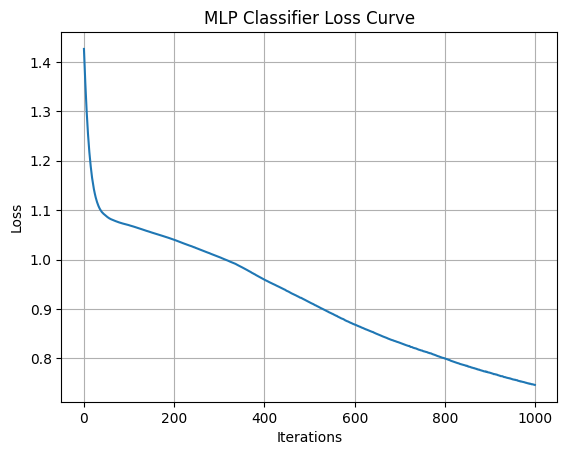

In [5]:
import matplotlib.pyplot as plt

# Train the MLP again with max_iter=1000 to ensure better convergence
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', 
                    max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

# Plot the loss curve
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('MLP Classifier Loss Curve')
plt.grid()
plt.show()
